# Isolation Forest
Isolation Forest is a powerful and efficient algorithm for anomaly detection, especially in high dimensional data. It works well with large datasets, as it uses random partitioning to isolate anomalies, making it faster than other methods like k-NN. Unlike some algorithms, it doesn't rely on labeled data, so it’s ideal for unsupervised learning. The model is also versatile, handling both numerical and categorical data, and is robust to noise, making it effective in real-world scenarios. It doesn’t assume any specific data distribution, which gives it an advantage in diverse applications. Furthermore, it’s easy to interpret, scales well for both small and large datasets, and is less sensitive to parameter tuning, providing reliable results even with default settings. Overall, Isolation Forest is great for detecting outliers or unusual behavior in data without needing prior knowledge of the anomalies.

But isolation forest main weakness are detecting inliers

<img src="images/isolation.png" alt="isolation forest" style="width: 800px;"/>

This is one of the alternative models that can be used for anomaly detection

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## Extracting Processed Data
Extracting Data that are already processed in other notebooks

In [2]:
df = pd.read_csv('data/data_predicted.csv')
df

,timestamp,hourly average,usage,hour,year,month,week,weekday,usage_scaled
0,2024-02-01 00:00:00,1.955991e+07,0.000000,0,2024,2,5,3,0.000000
1,2024-02-01 01:00:00,1.956011e+07,0.199500,1,2024,2,5,3,0.005519
2,2024-02-01 02:00:00,1.956033e+07,0.220500,2,2024,2,5,3,0.006099
3,2024-02-01 03:00:00,1.956056e+07,0.225000,3,2024,2,5,3,0.006224
4,2024-02-01 04:00:00,1.956076e+07,0.204500,4,2024,2,5,3,0.005657
...,...,...,...,...,...,...,...,...,...
5025,2024-08-28 09:00:00,4.186957e+07,13.110667,9,2024,8,35,2,0.362667
5026,2024-08-28 10:00:00,4.189131e+07,21.741000,10,2024,8,35,2,0.601399
5027,2024-08-28 11:00:00,4.190912e+07,17.805583,11,2024,8,35,2,0.492537
5028,2024-08-28 12:00:00,4.192575e+07,16.629350,12,2024,8,35,2,0.460000


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

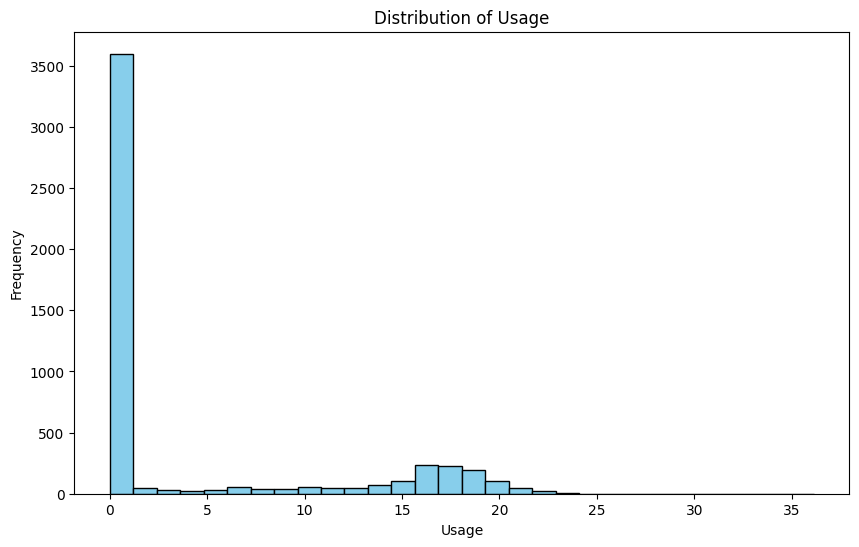

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['usage'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Usage')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()

## Isolation Forest Implementation

In [5]:
data = df[['usage','hour','weekday']]
model = IsolationForest(n_estimators=1000, contamination=0.008, random_state=42)
data['anomaly'] = model.fit_predict(df[['usage', 'hour','weekday']])

C:\Users\62813\AppData\Local\Temp\ipykernel_8060\1397192449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly'] = model.fit_predict(df[['usage', 'hour','weekday']])


In [6]:
anomalies = data[data['anomaly'] == -1]

In [7]:
anomalies

,usage,hour,weekday,anomaly
timestamp,,,,
2024-02-12 11:00:00,23.027333,11,0,-1
2024-03-04 20:00:00,10.280867,20,0,-1
2024-03-04 21:00:00,17.974333,21,0,-1
2024-03-04 22:00:00,14.408000,22,0,-1
2024-03-04 23:00:00,4.499400,23,0,-1
2024-03-05 23:00:00,8.103633,23,1,-1
2024-03-06 00:00:00,8.246200,0,2,-1
2024-03-06 07:00:00,24.975000,7,2,-1
2024-03-15 12:00:00,22.921800,12,4,-1


## Plotting and Output

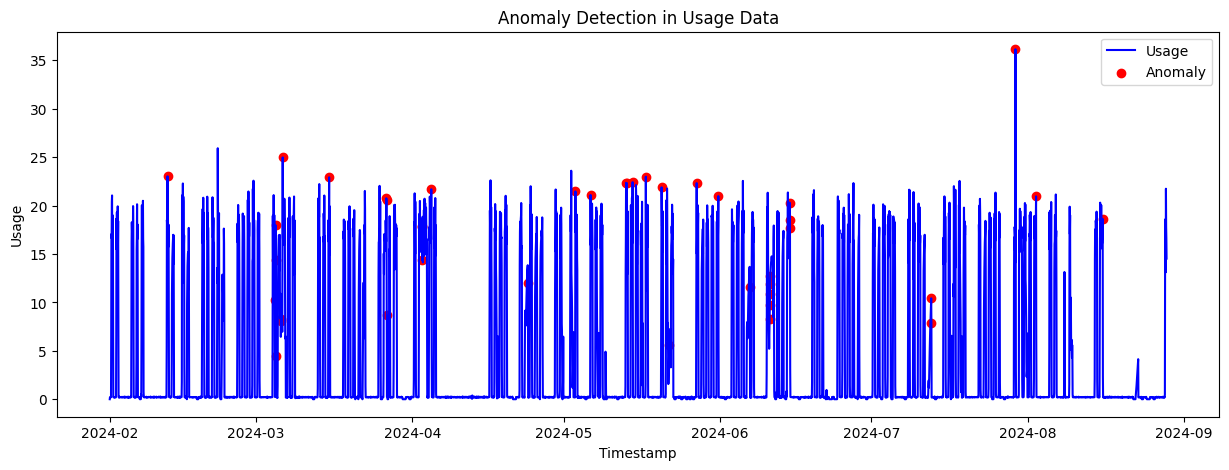

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['usage'], color='blue', label='Usage')
plt.scatter(anomalies.index, anomalies['usage'], color='red', label='Anomaly', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Usage')
plt.title('Anomaly Detection in Usage Data')
plt.legend()
plt.show()

In [9]:
for index, row in anomalies.iterrows():
    print(f"Anomaly detected on {index}:")
    print(f"  - Usage Value: {row['usage']}")
    print("-" * 40)

Anomaly detected on 2024-02-12 11:00:00:
  - Usage Value: 23.02733333333209
----------------------------------------
Anomaly detected on 2024-03-04 20:00:00:
  - Usage Value: 10.280866666667164
----------------------------------------
Anomaly detected on 2024-03-04 21:00:00:
  - Usage Value: 17.97433333333209
----------------------------------------
Anomaly detected on 2024-03-04 22:00:00:
  - Usage Value: 14.408
----------------------------------------
Anomaly detected on 2024-03-04 23:00:00:
  - Usage Value: 4.49939999999851
----------------------------------------
Anomaly detected on 2024-03-05 23:00:00:
  - Usage Value: 8.103633333332837
----------------------------------------
Anomaly detected on 2024-03-06 00:00:00:
  - Usage Value: 8.246199999999256
----------------------------------------
Anomaly detected on 2024-03-06 07:00:00:
  - Usage Value: 24.975
----------------------------------------
Anomaly detected on 2024-03-15 12:00:00:
  - Usage Value: 22.921800000000744
---------

In [10]:
import joblib

joblib.dump(model, 'deployment/isolation_forest_model.pkl')

['deployment/isolation_forest_model.pkl']